In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# PubChem AID 720659

## Assay info

The Pregnane X receptor (PXR) plays a critical role in the regulation of genes involved in drug metabolism and transporters. Activation of PXR may be involved in the unwanted adverse drug-drug interactions. The interaction of drugs and xenobiotics with PXR will induce a group of enzymes including cytochrome P450 enzymes and glutathione transferases. Therefore, identification of compounds with the potential for PXR activation can be of importance in improving the efficacy of drugs with less toxicity and avoiding drug-drug interactions.


DPX-2 (Puracyp, Inc.) cell line, used for screening against human PXR activation, is the HepG2 cells co-transfected with a PXR response element and a luciferase construct containing CYP3A4 promoter. Increase in luciferase activity can be used to identify the compounds that activate the PXR pathway.


In [33]:
df = pd.read_csv("PubChem_AID_720659/AID_720659_datatable_all.csv")

In [34]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype-Replicate_1',
 'Potency-Replicate_1',
 'Efficacy-Replicate_1',
 'Analysis Comment-Replicate_1',
 'Activity_Score-Replicate_1',
 'Curve_Description-Replicate_1',
 'Fit_LogAC50-Replicate_1',
 'Fit_HillSlope-Replicate_1',
 'Fit_R2-Replicate_1',
 'Fit_InfiniteActivity-Replicate_1',
 'Fit_ZeroActivity-Replicate_1',
 'Fit_CurveClass-Replicate_1',
 'Excluded_Points-Replicate_1',
 'Max_Response-Replicate_1',
 'Activity at 0.0005215015 uM-Replicate_1',
 'Activity at 0.00156 uM-Replicate_1',
 'Activity at 0.00466 uM-Replicate_1',
 'Activity at 0.00590 uM-Replicate_1',
 'Activity at 0.014 uM-Replicate_1',
 'Activity at 0.042 uM-Replicate_1',
 'Activity at 0.068 uM-Replicate_1',
 'Activity at 0.127 uM-Replicate_1',
 'Activity at 0.378 uM-Replicate_1',
 'Activity at 0.782 uM-Replicate_1',
 

In [38]:
# first 5 rows are metadata 
df[0:5]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 43.68 uM-Replicate_4,Activity at 92.27 uM-Replicate_4,Activity at 218.9 uM-Replicate_4,Activity at 489.4 uM-Replicate_4,Activity at 1094.5 uM-Replicate_4,Activity at 2447.4 uM-Replicate_4,Activity at 5811.1 uM-Replicate_4,Activity at 12995.4 uM-Replicate_4,Activity at 29059.9 uM-Replicate_4,Activity at 64977.0 uM-Replicate_4
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,FLOAT,...,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indicates type of activity observed: inhibitor...,Concentration at which compound exhibits half-...,...,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,MICROMOLAR,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.6833,92.2654,218.934,489.435,1094.55,2447.39,5811.06,12995.4,29059.9,64977


In [39]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [40]:
df.head(10)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 43.68 uM-Replicate_4,Activity at 92.27 uM-Replicate_4,Activity at 218.9 uM-Replicate_4,Activity at 489.4 uM-Replicate_4,Activity at 1094.5 uM-Replicate_4,Activity at 2447.4 uM-Replicate_4,Activity at 5811.1 uM-Replicate_4,Activity at 12995.4 uM-Replicate_4,Activity at 29059.9 uM-Replicate_4,Activity at 64977.0 uM-Replicate_4
0,1,144203881.0,5995.0,CCC(=O)O[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,144204428.0,12035.0,CC(=O)N[C@@H](CS)C(=O)O,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,144204430.0,5753.0,C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2[C@H](C[C@]4...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,70.7946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,144204433.0,657298.0,CCCC1=CC(=O)NC(=S)N1,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,144204445.0,35370.0,CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CO)N=...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,70.7946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,144204448.0,5284443.0,CNC[C@@H](C1=CC(=CC=C1)O)O.Cl,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,144204468.0,38852.0,C[C@](CC1=CC(=C(C=C1)O)O)(C(=O)O)N.C[C@](CC1=C...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,144204489.0,2733525.0,CC/C(=C(\C1=CC=CC=C1)/C2=CC=C(C=C2)OCCN(C)C)/C...,Inconclusive,22.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,3.9811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,144204491.0,47936.0,CC(=O)O[C@H]1[C@H]([C@@H]2[C@]([C@H](CCC2(C)C)...,Active,42.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,44.6684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,144204498.0,6167.0,CC(=O)N[C@H]1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C1...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,0.8913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Activation', 'Standard Deviation'],
      dtype='object')

In [41]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

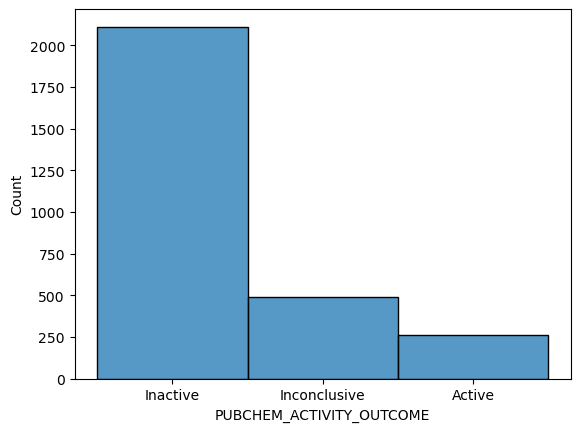

In [42]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

<Axes: xlabel='Phenotype-Replicate_1', ylabel='count'>

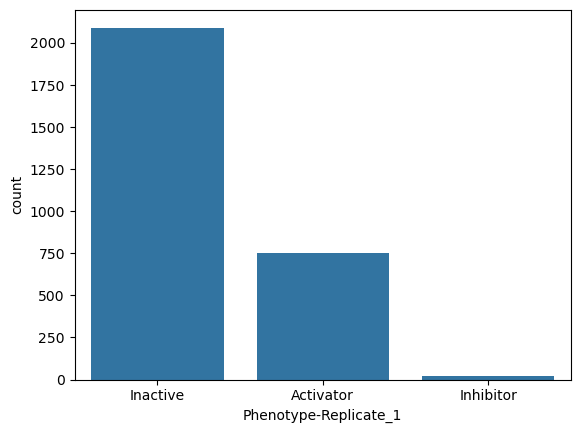

In [59]:
sns.countplot(data=df, x="Phenotype-Replicate_1")

<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

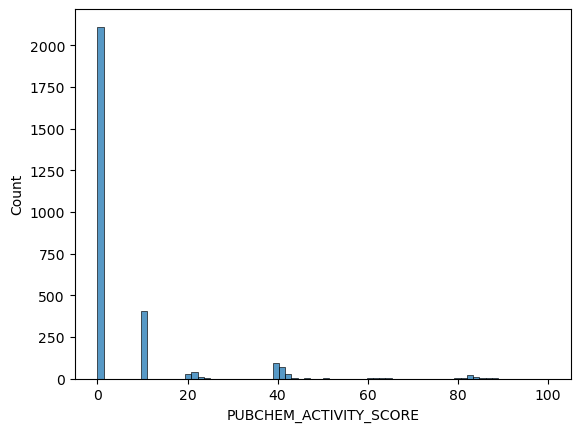

In [43]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

In [46]:
import matplotlib.pyplot as plt

In [47]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [48]:
len(df)

2864

In [49]:
len(df)

2864

In [50]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [51]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [52]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df[mol_col].progress_apply(lambda x: standardize_smiles(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2864/2864 [00:14<00:00, 194.24it/s]


In [53]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [54]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2864/2864 [00:00<00:00, 5844.06it/s]


In [55]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

np.int64(19)

In [60]:
df.dropna(subset="INCHIKEY")

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 218.9 uM-Replicate_4,Activity at 489.4 uM-Replicate_4,Activity at 1094.5 uM-Replicate_4,Activity at 2447.4 uM-Replicate_4,Activity at 5811.1 uM-Replicate_4,Activity at 12995.4 uM-Replicate_4,Activity at 29059.9 uM-Replicate_4,Activity at 64977.0 uM-Replicate_4,CANONICAL_SMILES,INCHIKEY
0,1,144203881.0,5995.0,CCC(=O)O[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCC(=O)O[C@H]1CC[C@H]2[C@@H]3CC=C4CC(=O)CC[C@]...,OFMVEGGTEFSSGL-BLQWBTBKSA-N
1,2,144204428.0,12035.0,CC(=O)N[C@@H](CS)C(=O)O,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(=O)NC(CS)C(=O)O,PWKSKIMOESPYIA-UHFFFAOYSA-N
2,3,144204430.0,5753.0,C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2[C@H](C[C@]4...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,70.7946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C...,OMFXVFTZEKFJBZ-ORVDRNQDSA-N
3,4,144204433.0,657298.0,CCCC1=CC(=O)NC(=S)N1,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCCc1cc(=O)[nH]c(=S)[nH]1,KNAHARQHSZJURB-UHFFFAOYSA-N
4,5,144204445.0,35370.0,CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CO)N=...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,70.7946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,HBOMLICNUCNMMY-XLPZGREQSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2860,50126367.0,3715.0,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,CGIGDMFJXJATDK-UHFFFAOYSA-N
2860,2861,50126368.0,443939.0,C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cccc2c(O)c3c(c(O)c12)C(=O)C1=C(C[C@@](O)(C...,XZTGINNGSQCYPR-TZSSRYMLSA-N
2861,2862,50126369.0,5281708.0,C1=CC(=CC=C1C2=COC3=C(C2=O)C=CC(=C3)O)O,Active,41.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,44.6684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12,ZQSIJRDFPHDXIC-UHFFFAOYSA-N
2862,2863,84986994.0,10788.0,CN1CN(C(=S)SC1)C,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/pxr-dp...,NaN,Activator,70.7946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN1CSC(=S)N(C)C1,QAYICIQNSGETAS-UHFFFAOYSA-N


In [61]:
# lets gather up the activities?

In [62]:
# ok, clean up DF, and segement into active and inactives,

In [63]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [64]:
clean = df[keep_cols]

In [65]:
clean["dataset"] = "aid720659"
clean["data_type"] = "assay"

/tmp/ipykernel_46369/1342538554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["dataset"] = "aid720659"
/tmp/ipykernel_46369/1342538554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["data_type"] = "assay"


In [66]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

/tmp/ipykernel_46369/212178452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"


In [67]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

MolGridWidget()

In [68]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "agonist"

/tmp/ipykernel_46369/1447994237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["common_name"] = pd.NA
/tmp/ipykernel_46369/1447994237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["action_type"] = "agonist"


In [69]:
clean.to_csv("./processed/AID_720659.csv", index=False)